# import cv2



In [22]:
import cv2
print(cv2.__version__)

4.9.0


In [1]:
!pip install opencv-python


In [3]:
import sys
sys.executable


'C:\\Users\\USER\\anaconda3\\python.exe'

In [4]:
!{sys.executable} -m pip install opencv-python


# check version and confirm

In [6]:
import cv2
print(cv2.__version__)

4.9.0


In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# start and check samlples

In [3]:
img = cv2.imread("C:\POPSTAR\model\data set\jack harlow - Google Search\co_image_.jpg")
img.shape

(320, 320, 3)

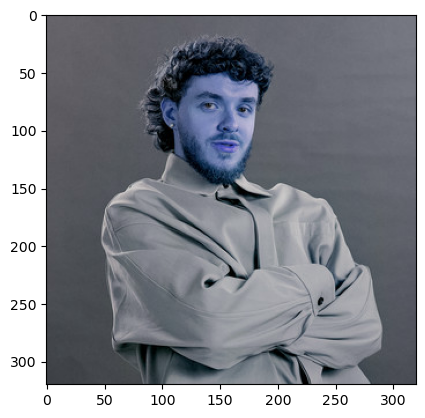

In [4]:
plt.imshow(img)

In [5]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(320, 320)

# #gray picture


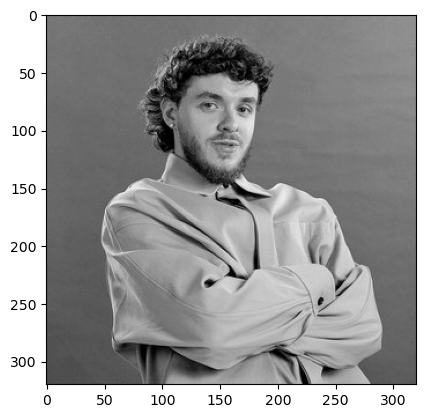

In [6]:
plt.imshow(gray, cmap='gray')

# use hard cascade to detect eyes.open cv documentstion


In [7]:
face_cascade = cv2.CascadeClassifier("C:/POPSTAR/model/HARDCASCADE/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:/POPSTAR/model/HARDCASCADE/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
faces

array([[117,  48,  81,  81]])

parameters in the array meant

#The first element (117) is the x-coordinate of the top-left corner of the detected face bounding box. The second element (48) is the y-coordinate of the top-left corner of the detected face bounding box. The third element (81) is the width of the detected face bounding box. The fourth element (81) is the height of the detected face bounding box.

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(117, 48, 81, 81)

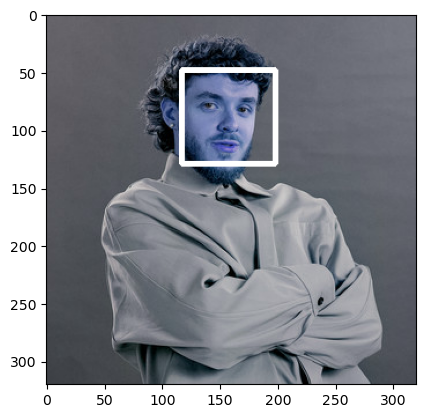

In [9]:
face_img=cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), 3)
plt.imshow(face_img)

EXPLAINING THE CODE:20

(x, y, w, h) = faces[0], the values (x, y, w, h) are being unpacked from the first element of the faces array.

x: The x-coordinate of the top-left y: The y-coordinate of the top-left w: The width of the detected face bounding h: The height of the detected face bounding

EXPLAINING THE CODE:22

This code draws a white rectangle around the first detected face using the cv2.rectangle function. The (255, 255, 255) specifies the color of the rectangle,, and 3 is the thickness of the rectangle.

In [10]:
cv2.destroyAllWindows() # close all the OpenCV windows that are currently open.
for (x, y, w, h) in faces:
    face_img=cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    
    cv2.imshow('Eye Detection', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
#used codes refering cv2 documentation.

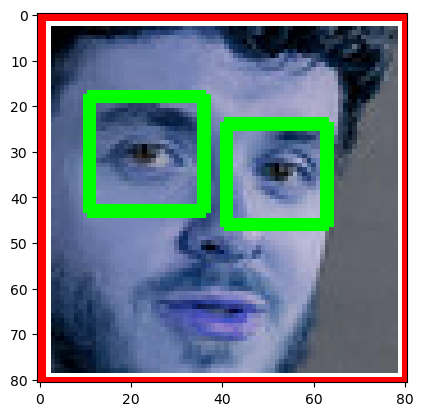

In [11]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')


# make a loop and going through every image in reference folder


In [12]:
path2data="C:\POPSTAR\model\data set"
path2croppeddata="C:\POPSTAR\model\Cropped images"

list_img_directories=[]
import os

for i in os.scandir(path2data):
    if i.is_dir():
        list_img_directories.append(i.path)
        
        

In [13]:
print(list_img_directories)

['C:\\POPSTAR\\model\\data set\\bruno mars pictures - Google Search', 'C:\\POPSTAR\\model\\data set\\drake - Google Search', 'C:\\POPSTAR\\model\\data set\\jack harlow - Google Search', 'C:\\POPSTAR\\model\\data set\\post malone - Google Search', 'C:\\POPSTAR\\model\\data set\\the weeknd - Google Search']


In [14]:
import shutil #sert of file handling
if os.path.exists(path2croppeddata):
    shutil.rmtree(path2croppeddata) #remove if existed
os.mkdir(path2croppeddata)  

In [24]:
import cv2
import os

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
        
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Unable to load image at {image_path}")
            return None
        
        if img is not None:  # Check if the image is successfully loaded
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)
              
path_to_data = r"C:\POPSTAR\model\data set"
path_to_cr_data = r"C:\POPSTAR\model\Cropped images"

img_dirs = []
cropped_image_dirs = []
celebrity_file_names_dict = {}

def process_images(img_dir):
    count = 1
    celebrity_name = os.path.basename(img_dir)
    print("Processing:", celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)

        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)

            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:", cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

for img_dir in img_dirs:
    process_images(img_dir)

print("Processing completed.")


Processing: bruno mars pictures - Google Search
Processing: drake - Google Search
Processing: post malone - Google Search
Generating cropped images in folder: C:\POPSTAR\model\Cropped images\post malone - Google Search
Processing: the weeknd - Google Search
Generating cropped images in folder: C:\POPSTAR\model\Cropped images\the weeknd - Google Search
Processing completed.


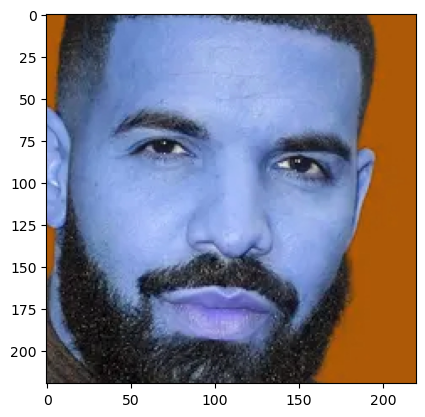

In [33]:
cropped_image = get_cropped_image_if_2_eyes("C:\\POPSTAR\\model\\data set\\drake - Google Search\\0x0.jpg")
plt.imshow(cropped_image)


In [29]:
#ref:stack overflow

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

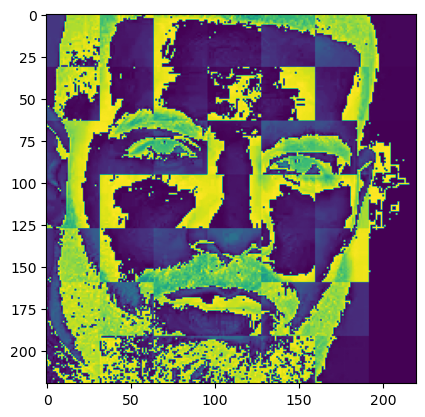

In [37]:

drake_wave = w2d(cropped_image,'db1',5)
plt.imshow(drake_wave)

In [36]:
celebrity_file_names_dict


{'bruno mars pictures - Google Search': ['C:\\POPSTAR\\model\\Cropped images\\bruno mars pictures - Google Search\\bruno mars pictures - Google Search1.png',
  'C:\\POPSTAR\\model\\Cropped images\\bruno mars pictures - Google Search\\bruno mars pictures - Google Search2.png',
  'C:\\POPSTAR\\model\\Cropped images\\bruno mars pictures - Google Search\\bruno mars pictures - Google Search3.png',
  'C:\\POPSTAR\\model\\Cropped images\\bruno mars pictures - Google Search\\bruno mars pictures - Google Search4.png',
  'C:\\POPSTAR\\model\\Cropped images\\bruno mars pictures - Google Search\\bruno mars pictures - Google Search5.png',
  'C:\\POPSTAR\\model\\Cropped images\\bruno mars pictures - Google Search\\bruno mars pictures - Google Search6.png',
  'C:\\POPSTAR\\model\\Cropped images\\bruno mars pictures - Google Search\\bruno mars pictures - Google Search7.png',
  'C:\\POPSTAR\\model\\Cropped images\\bruno mars pictures - Google Search\\bruno mars pictures - Google Search8.png',
  'C:\\PO

In [43]:
#add those cods because y axis cant hold intiger values.nned to keep them as a
#....number

Artist= {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    Artist[celebrity_name] = count
    count = count + 1
Artist

{'bruno mars pictures - Google Search': 0,
 'drake - Google Search': 1,
 'post malone - Google Search': 2,
 'the weeknd - Google Search': 3}

In [53]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))#resize
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        #stacked on top of
        X.append(combined_img)
        y.append(Artist[celebrity_name])  

In [55]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape #turn in to an array

(146, 4096)

In [57]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report